In [1]:
!pip install datadotworld
!pip install datadotworld[pandas]

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np


In [0]:
#!dw configure

In [0]:
import datadotworld as dw


In [0]:
#drive.mount("/content/drive")

In [7]:
cd "drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [8]:
ls

ColabDriveGithub.ipynb  data_workshop/


In [9]:
cd data_workshop/

/content/drive/My Drive/Colab Notebooks/data_workshop


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('https://data.world/datafiniti/mens-shoe-prices')

In [17]:
data.dataframes


LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [15]:
data

LocalDataset('/root/.dw/cache/piotrb/mens-shoes-prices/latest/datapackage.json')

In [18]:
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [19]:
df.shape

(19387, 48)

In [21]:
df.sample(3)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
10662,AVpfQsicilAPnD_xYVza,NaN,Rainbow,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-06-08T05:28:31Z,2016-06-08T05:28:31Z,"[{""dateSeen"":[""2016-06-08T05:28:31Z""],""sourceU...",NaN,NaN,"[{""key"":""Heel Height"",""value"":[""Flat (0 to 1/2...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-4f34/...,NaN,rainbow/301alts,NaN,301ALTS,"[{""dateSeen"":[""2016-06-08T05:28:31Z""],""name"":""...",Rainbow Eco Men Us 6.5 Nude Flip Flop Sandal,21.99,21.99,NaN,NaN,new,NaN,USD,2016-06-08T05:28:31Z,2016-06-07T00:00:00Z,NaN,true,ApparelSave - Walmart.com,REDUCED USD 29.01,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Rainbow-Eco-Men-US-6...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Rainbow-Eco-Men-US-6...,NaN,NaN,NaN,NaN
17641,AVpfmnMhLJeJML43ASHt,"B007HANMJC,B007HANIAU,B007HANINW",ONGUARD Industries,"Overalls & Coveralls,Overalls,Uniforms, Work &...",NaN,NaN,2015-12-05T21:26:50Z,2016-06-18T12:00:57Z,NaN,NaN,NaN,NaN,NaN,http://ecx.images-amazon.com/images/I/41f85YjR...,NaN,onguard76050pvconpolyesterbiboverallwithplainf...,NaN,76050,NaN,Onguard 76050 Pvc On Polyester Bib Overall Wit...,14.13,14.13,NaN,NaN,NaN,NaN,USD,2015-12-05T21:26:50Z,2015-12-23T00:00:00Z,NaN,true,Amazon.com,NaN,NaN,FREE Shipping on orders over USD 35.00,NaN,NaN,http://www.amazon.com/ONGUARD-76050-Polyester-...,NaN,NaN,NaN,NaN,NaN,http://www.amazon.com/ONGUARD-76050-Polyester-...,NaN,NaN,NaN,NaN
370,AVpfEKbf1cnluZ0-dIgl,NaN,Walleva,"Clothing, Shoes, Accessories,Men's Sunglasses","Titanium,Grey",NaN,2016-02-14T11:22:43Z,2016-02-14T11:25:38Z,NaN,NaN,6.166416e+11,"[{""key"":""Style"",""value"":[""For Oakley Gascan""]}...",NaN,http://i.ebayimg.com/00/s/MTUwMFgxNTAw/z/9sQAA...,NaN,newwallevafireredreplacementlensesforoakleybat...,NaN,NaN,"[{""dateSeen"":[""2016-02-12T00:00:00Z""],""name"":""...",New Walleva Fire Red Replacement Lenses For Oa...,33.99,33.99,NaN,NaN,New with tags,NaN,AUD,2016-02-14T11:22:43Z,2016-02-12T00:00:00Z,NaN,false,NaN,NaN,NaN,AUD 12.42,NaN,NaN,http://www.ebay.com.au/itm/New-Walleva-Black-R...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com.au/itm/Ne...",http://www.ebay.com.au/itm/New-Walleva-Fire-Re...,616641629922,NaN,NaN,NaN


In [22]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [23]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
new                                                       3
UnbeatableSale.com, Inc. - Walmart.com                    3
New with box                                              3
PalmBeach Jewelry - Walmart.com                           3
Wholesale Costume and Party Supplies - Walmart.com        2
Shoes.com                                                 1
SHOEBACCA LTD. - Walmart.com                              1
New without tags                                          1
Name: prices_currency, dtype: int64

In [24]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
new                                                   0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
New with box                                          0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[df.prices_currency == 'USD'].copy()

In [27]:
df_usd.shape

(18524, 48)

In [0]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)

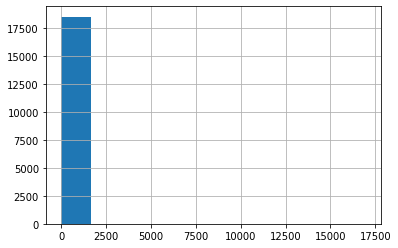

In [30]:
df_usd['prices_amountmin'].hist()

In [0]:
filter_max = np.percentile(df_usd['prices_amountmin'], 95)

In [0]:
df_usd_filter = df_usd[df_usd['prices_amountmin']<filter_max]

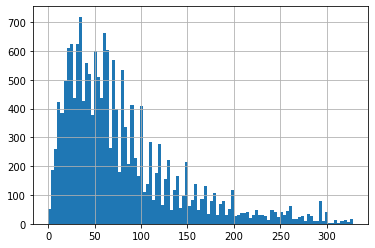

In [51]:
df_usd_filter.prices_amountmin.hist(bins=100)